In [1]:
# [n! * p_prob_extract^x_counts_extract * (1 - p_prob_extract)^*(n - x_counts_extract)] / [x_counts_extract! * (n - x_counts_extract)!],
# e.g. 3 successes (x_count_extractions) over 10 trials (n) of one dice side with 1/6 (p_prob_extract) : PMF = [10! * (1/6)^3 * (5/6)^7] / [3! * 7!]

import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# approximating multinomial distribution to a binomial case (dice case)

def PMF_exact_one_side(n_trials, n_sides, fair=True, p_extract=None, display=True, max_plots=999999999999):
    if fair:
        p_extract = 1/n_sides
    else:
        p_extract = p_extract
    
    n_plots=0
    max_plots=min(max_plots,n_trials)
    
    PMF_all_counts = []
    inv_CDF_all_counts = []
    
    x = [_ for _ in range(1, n_trials+1)]
    
    for x_counts in range(1, n_trials+1):
        PMF_all_counts.append([0 for _ in range(x_counts-1)]+
                              [np.math.factorial(i) * (p_extract**x_counts) * ((1-p_extract)**(i-x_counts)) / 
                               (np.math.factorial(x_counts) * np.math.factorial(i-x_counts)) 
                               for i in range(x_counts, n_trials+1)])
    
        if (display and n_plots<max_plots):
            plt.bar(x, PMF_all_counts[x_counts-1])
            plt.title(f'PMF for exactly {x_counts} successes')
            plt.xlabel('Number of Trials')
            plt.ylabel('Exact probability')
            plt.show()
            n_plots+=1
     
    n_plots=0
    for i in range(n_trials):
        
        inv_CDF_all_counts.append(np.sum(PMF_all_counts[i:n_trials], axis=0))
    
        if (display and n_plots<max_plots):    
            plt.bar(x, inv_CDF_all_counts[i], color='g')
            plt.title(f'inv_CDF for at least {i+1} successes')
            plt.xlabel('Number of Trials')
            plt.ylabel('Cumulative probability')
            plt.show()
            n_plots+=1
        
    return PMF_all_counts, inv_CDF_all_counts


C:\Users\Alienware\AppData\Local\Temp\ipykernel_49196\3228068345.py:19: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  [np.math.factorial(i) * (p_extract**x_counts) * ((1-p_extract)**(i-x_counts)) /
C:\Users\Alienware\AppData\Local\Temp\ipykernel_49196\3228068345.py:20: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  (np.math.factorial(x_counts) * np.math.factorial(i-x_counts))


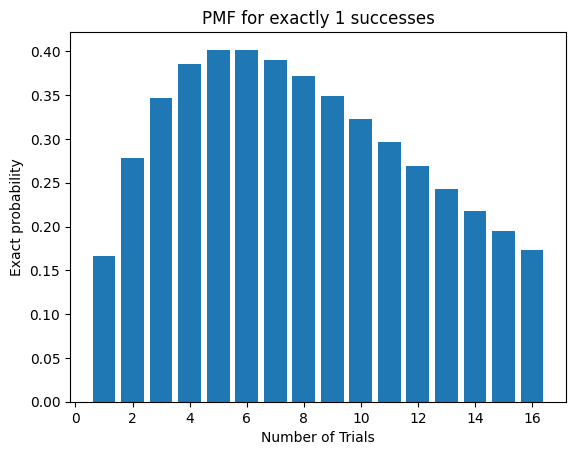

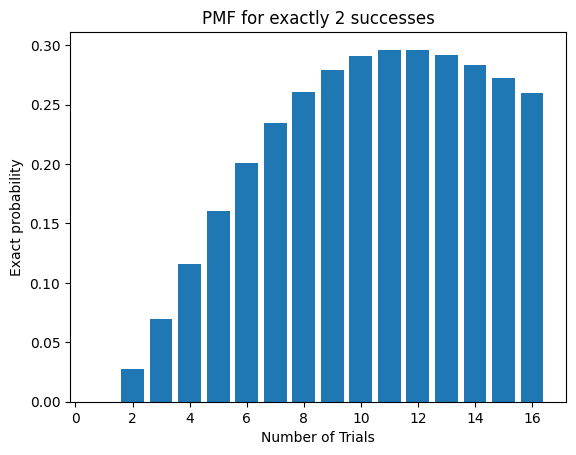

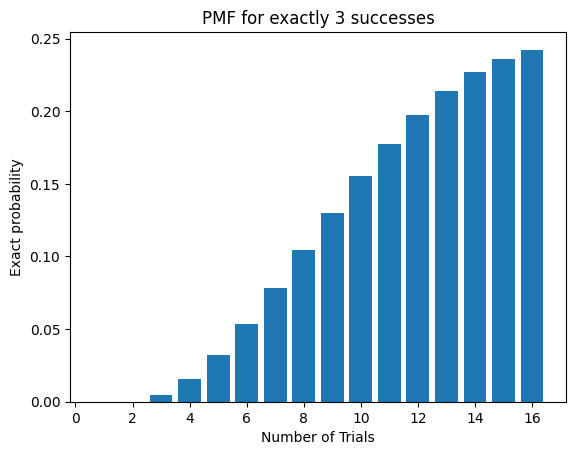

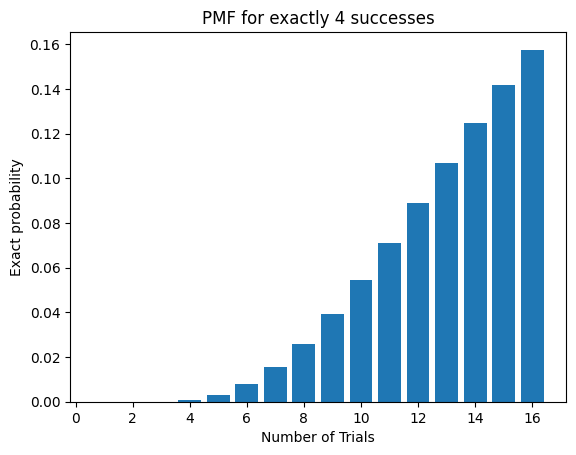

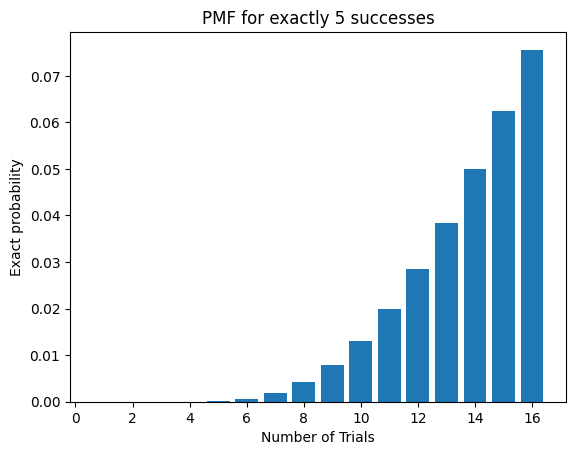

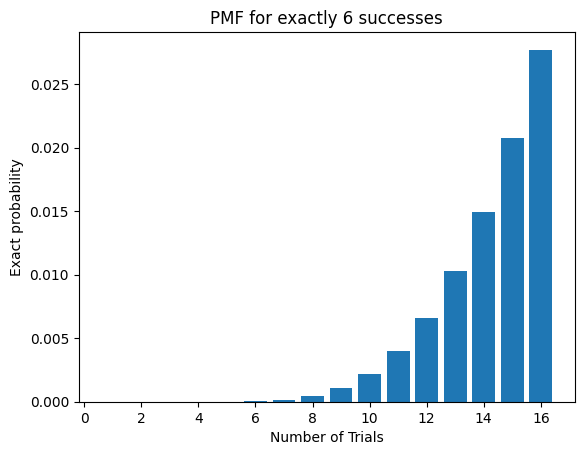

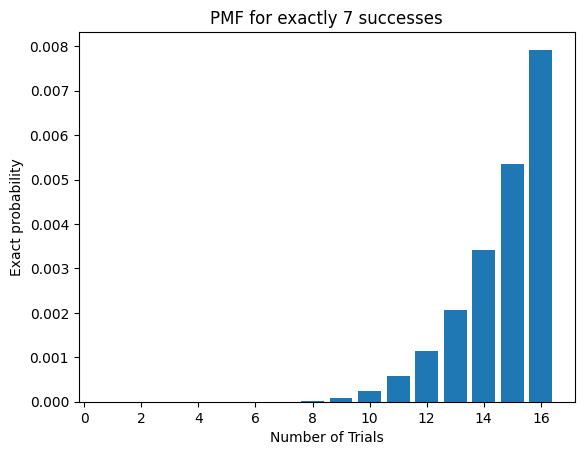

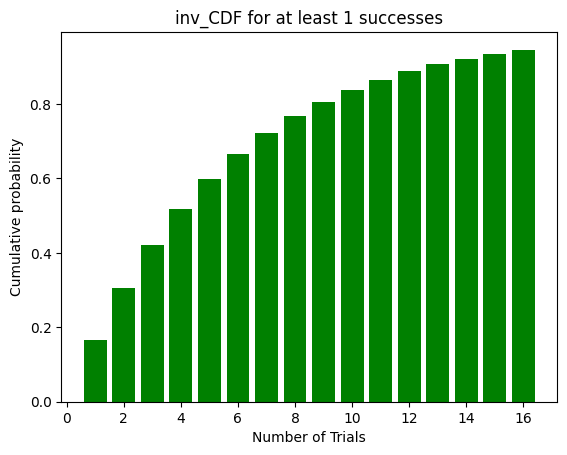

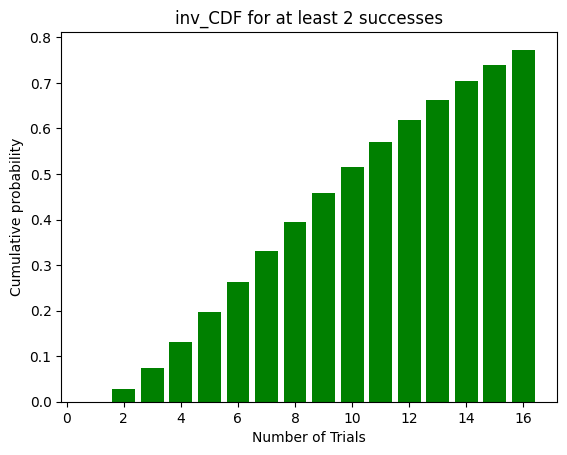

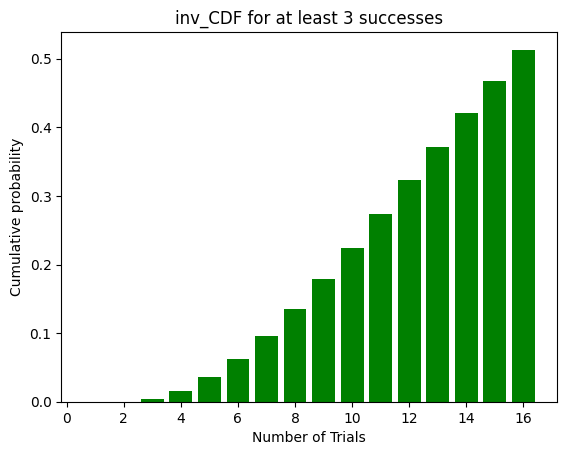

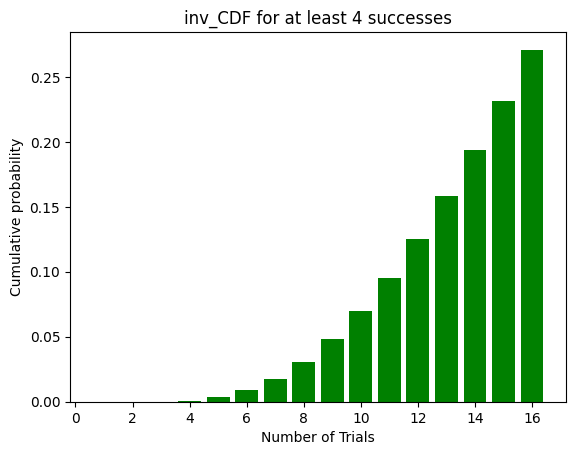

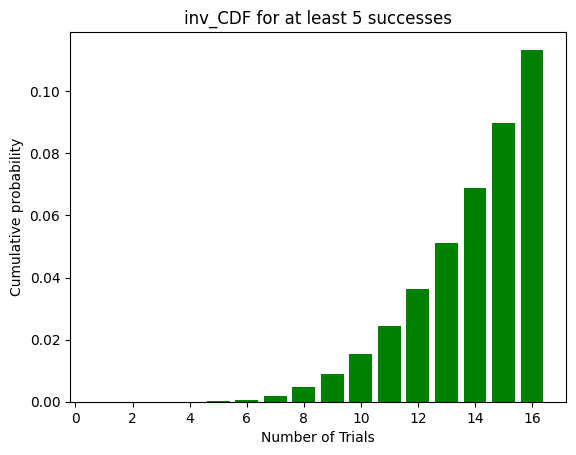

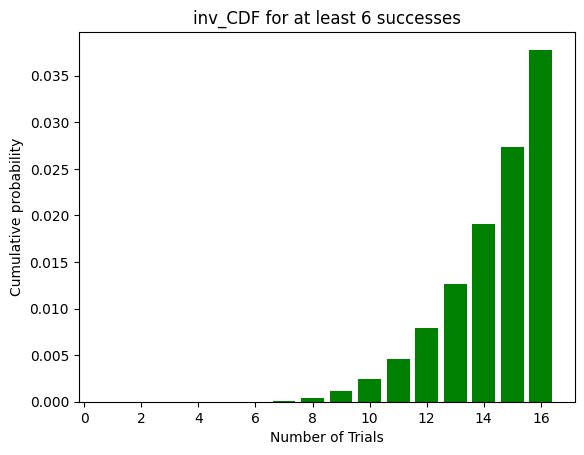

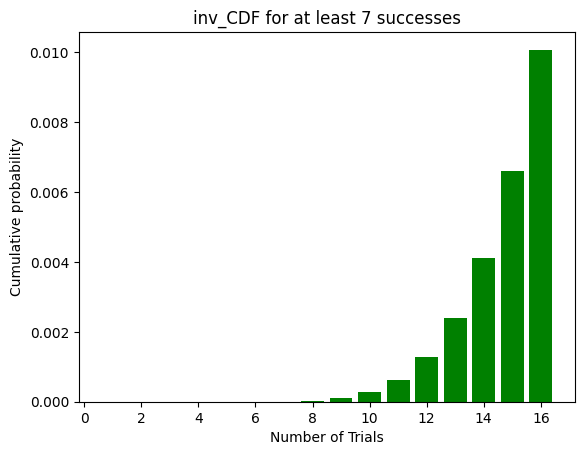

In [18]:
num_trials = 16
num_sides = 6

PMF_all_counts, inv_CDF_all_counts  = PMF_exact_one_side(n_trials=num_trials, n_sides=num_sides, display = True, max_plots=7)


In [4]:
# probability of exactly (PDF) or at least (inv_CDF) n_successes at the n_trials

n_successes = 1
n_trials = 6

print('PMF', PMF_all_counts[n_successes-1][n_trials-1])

print('inv_CDF', inv_CDF_all_counts[n_successes-1][n_trials-1])
  

PMF 0.401877572016461
inv_CDF 0.665102023319616


In [5]:
from scipy.stats import binom

# N.B.  The probability of getting at least x successes is given by the Survival Function (SF), aka complementary inv_CDF (CCDF).

# number of trials
n = 6

# probability of success (rolling a 6)
p = 1/6

# calculate the probability of getting less than 1 six
prob_less_than_1 = binom.cdf(0, n, p)

# subtract this from 1 to get the probability of getting at least 1 six
prob_at_least_1 = 1 - prob_less_than_1

print(f"The probability of rolling a 6 at least once in 6 rolls is {prob_at_least_1}")


The probability of rolling a 6 at least once in 6 rolls is 0.6651020233196159


In [6]:
# probability of exactly (PDF) or at least (inv_CDF) n_successes at the n_trials

n_successes = 2
n_trials = 12

print('PMF', PMF_all_counts[n_successes-1][n_trials-1])

print('inv_CDF', inv_CDF_all_counts[n_successes-1][n_trials-1])

PMF 0.2960935686313839
inv_CDF 0.6186673737323088


In [7]:
# number of trials
n = 12

# calculate the probability of getting less than 2 sixes
prob_less_than_2 = binom.cdf(1, n, p)

# subtract this from 1 to get the probability of getting at least 2 sixes
prob_at_least_2 = 1 - prob_less_than_2

print(f"The probability of rolling a 6 at least twice in 12 rolls is {prob_at_least_2}")


The probability of rolling a 6 at least twice in 12 rolls is 0.6186673737323084


In [8]:
# probability of exactly (PDF) or at least (inv_CDF) n_successes at the n_trials

n_successes = 3
n_trials = 18

print('PMF', PMF_all_counts[n_successes-1][n_trials-1])

print('inv_CDF', inv_CDF_all_counts[n_successes-1][n_trials-1])

PMF 0.24519844796019255
inv_CDF 0.5973456859477233


In [9]:
# number of trials
n = 18

# calculate the probability of getting less than 3 sixes
prob_less_than_3 = binom.cdf(2, n, p)

# subtract this from 1 to get the probability of getting at least 3 sixes
prob_at_least_3 = 1 - prob_less_than_3

print(f"The probability of rolling a 6 at least three times in 18 rolls is {prob_at_least_3}")


The probability of rolling a 6 at least three times in 18 rolls is 0.5973456859477227


C:\Users\Alienware\AppData\Local\Temp\ipykernel_49196\3228068345.py:19: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  [np.math.factorial(i) * (p_extract**x_counts) * ((1-p_extract)**(i-x_counts)) /
C:\Users\Alienware\AppData\Local\Temp\ipykernel_49196\3228068345.py:20: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  (np.math.factorial(x_counts) * np.math.factorial(i-x_counts))


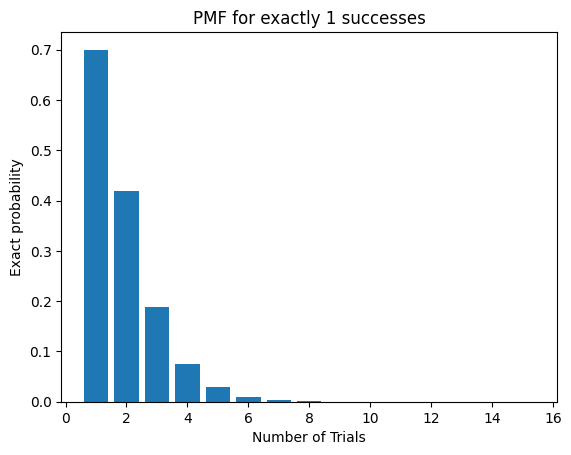

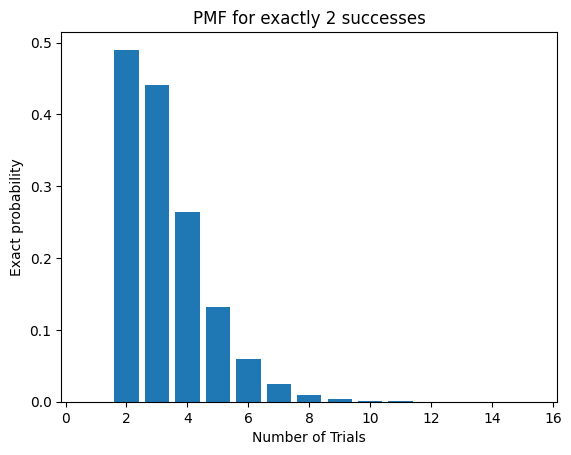

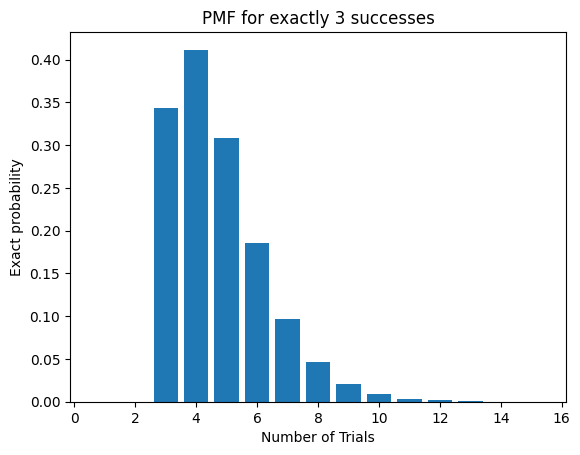

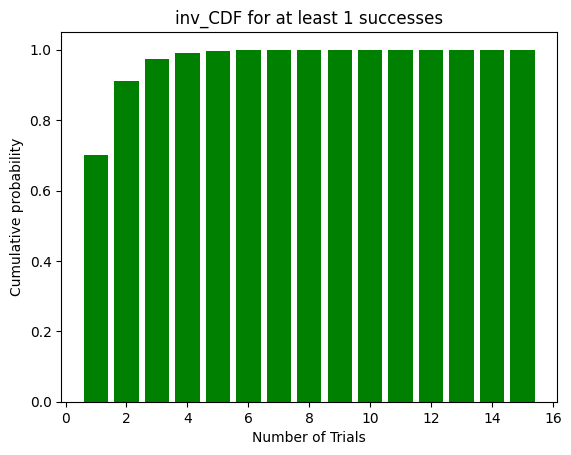

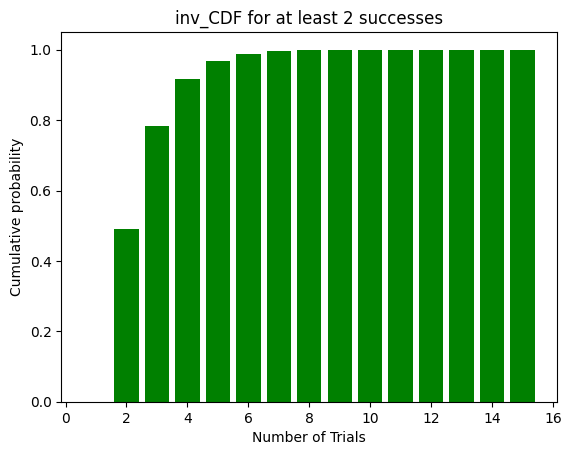

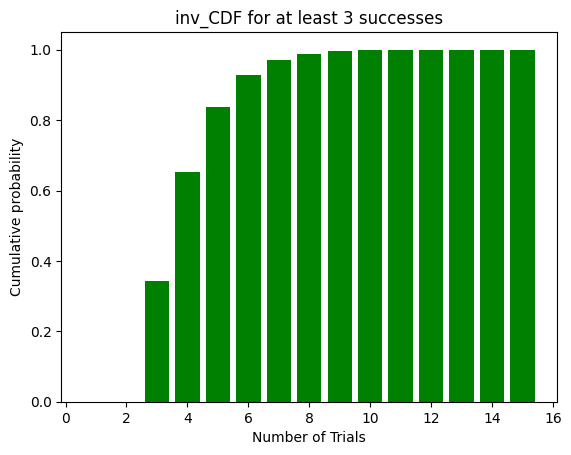

PMF 0.441
inv_CDF 0.7839999999999999


In [10]:
# Assume you sell sandwiches. 70% people choose egg, and the rest choose chicken. What is the probability of selling 2 egg sandwiches to the next 3 customers?

num_trials = 15 # set the desired successes below
num_sides = 1/0.7 # percentage of people choosing egg

PMF_all_counts, inv_CDF_all_counts  = PMF_exact_one_side(n_trials=num_trials, n_sides=num_sides, display = True, max_plots=3)

n_successes = 2 # at least two eggs (check inv_CDF if at lest two eggs, PMF if exactly two eggs)
n_trials = 3 # three sales

print('PMF', PMF_all_counts[n_successes-1][n_trials-1])

print('inv_CDF', inv_CDF_all_counts[n_successes-1][n_trials-1])

In [13]:
# approximating multinomial distribution to a binomial case (generic case)

def binom_from_multinom(n_trials, p_extract, display=True, max_plots=999999999999):
    
    n_plots=0
    max_plots=min(max_plots,n_trials)
    
    PMF_all_counts = []
    inv_CDF_all_counts = []
    
    x = [_ for _ in range(1, n_trials+1)]
    
    for x_counts in range(1, n_trials+1):
        PMF_all_counts.append([0 for _ in range(x_counts-1)]+
                              [np.math.factorial(i) * (p_extract**x_counts) * ((1-p_extract)**(i-x_counts)) / 
                               (np.math.factorial(x_counts) * np.math.factorial(i-x_counts)) 
                               for i in range(x_counts, n_trials+1)])
    
        if (display and n_plots<max_plots):
            plt.bar(x, PMF_all_counts[x_counts-1])
            plt.title(f'PMF for exactly {x_counts} successes')
            plt.xlabel('Number of Trials')
            plt.ylabel('Exact probability')
            plt.show()
            n_plots+=1
     
    n_plots=0
    for i in range(n_trials):
        
        inv_CDF_all_counts.append(np.sum(PMF_all_counts[i:n_trials], axis=0))
    
        if (display and n_plots<max_plots):    
            plt.bar(x, inv_CDF_all_counts[i], color='g')
            plt.title(f'inv_CDF for at least {i+1} successes')
            plt.xlabel('Number of Trials')
            plt.ylabel('Cumulative probability')
            plt.show()
            n_plots+=1
        
    return PMF_all_counts, inv_CDF_all_counts


C:\Users\Alienware\AppData\Local\Temp\ipykernel_49196\3148302928.py:15: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  [np.math.factorial(i) * (p_extract**x_counts) * ((1-p_extract)**(i-x_counts)) /
C:\Users\Alienware\AppData\Local\Temp\ipykernel_49196\3148302928.py:16: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  (np.math.factorial(x_counts) * np.math.factorial(i-x_counts))


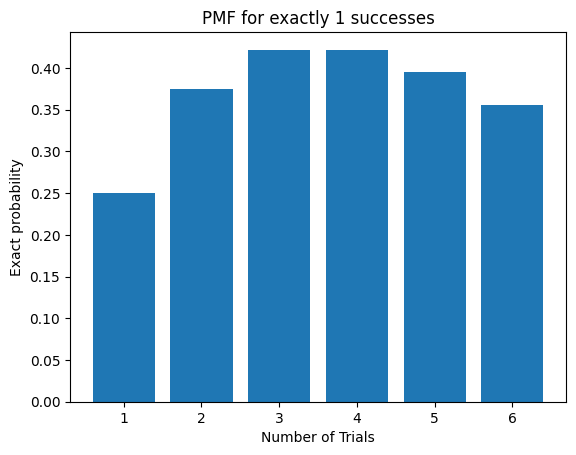

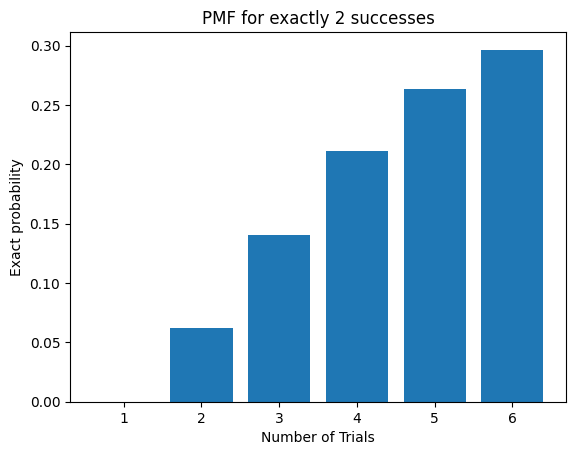

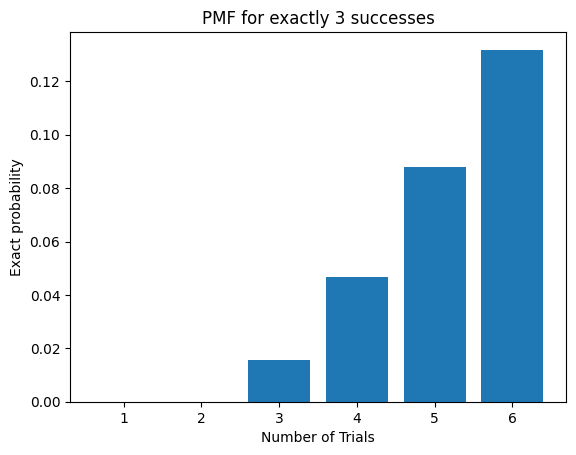

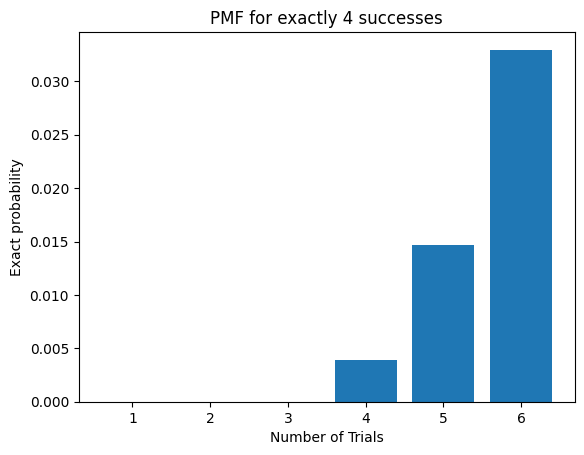

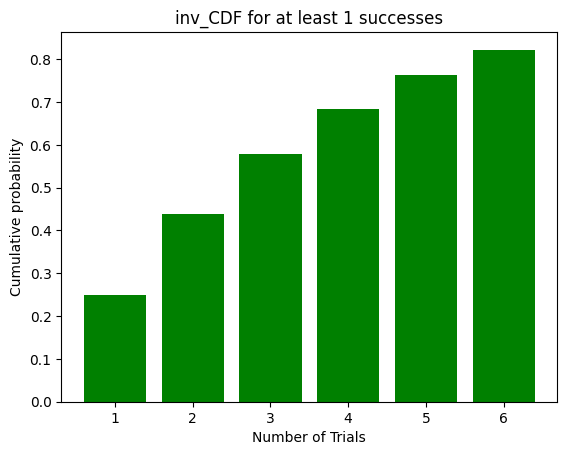

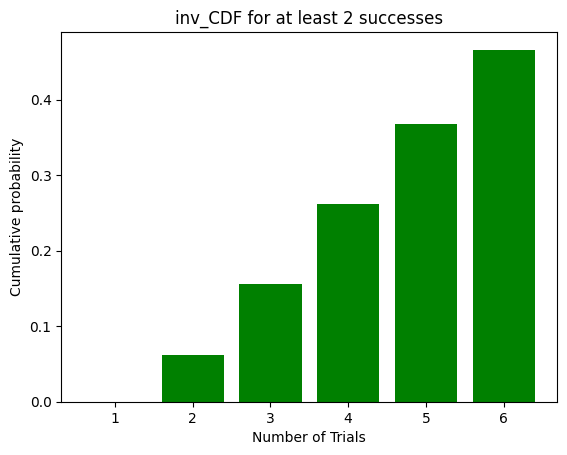

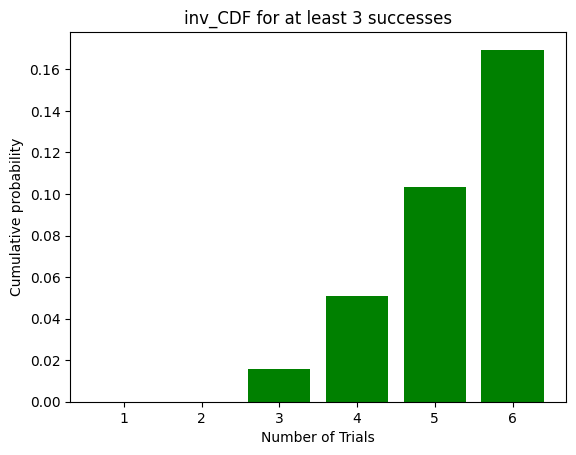

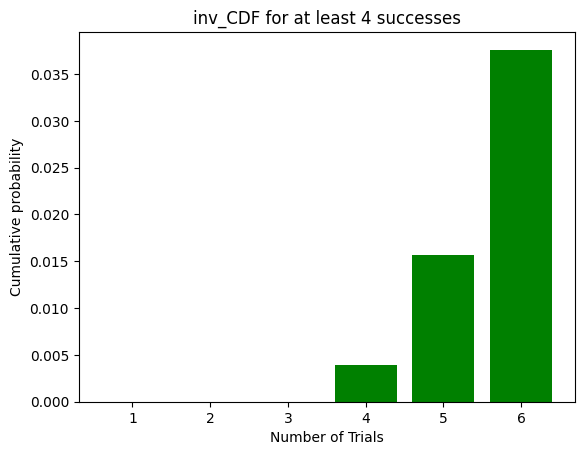

PMF 0.032958984375
inv_CDF 0.03759765625


In [14]:
# Hospital records show that 75% of patients suffering from a disease die due to that disease. What is the probability that 4 out of the 6 randomly selected patients recover?

num_trials = 6 # six patients
prob_recov = 1 - 0.75 # we have the probability of death

PMF_all_counts, inv_CDF_all_counts  = binom_from_multinom(n_trials=num_trials, p_extract=prob_recov, display = True, max_plots=4)

n_successes = 4 # at least four survivors over 6 patients
n_trials = num_trials

print('PMF', PMF_all_counts[n_successes-1][n_trials-1])

print('inv_CDF', inv_CDF_all_counts[n_successes-1][n_trials-1])

C:\Users\Alienware\AppData\Local\Temp\ipykernel_49196\3148302928.py:15: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  [np.math.factorial(i) * (p_extract**x_counts) * ((1-p_extract)**(i-x_counts)) /
C:\Users\Alienware\AppData\Local\Temp\ipykernel_49196\3148302928.py:16: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  (np.math.factorial(x_counts) * np.math.factorial(i-x_counts))


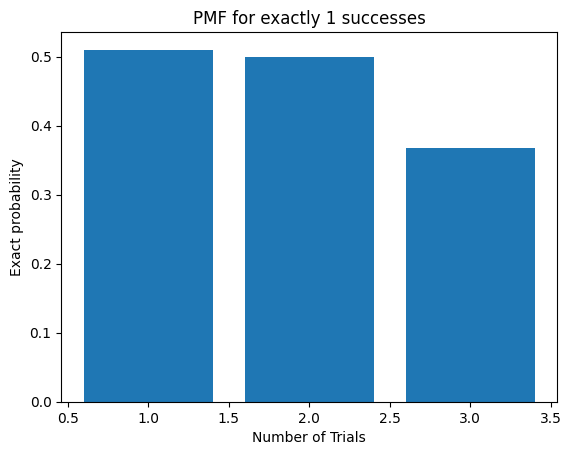

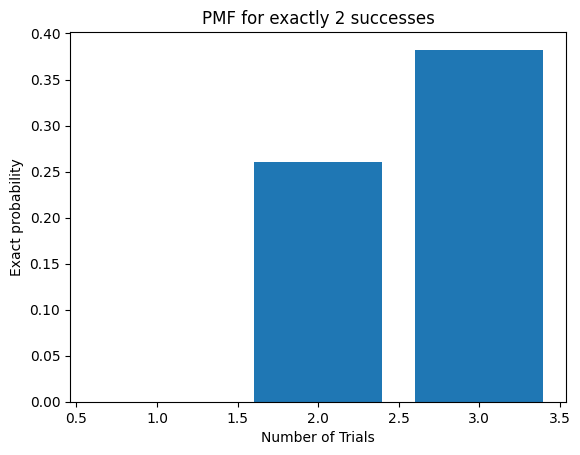

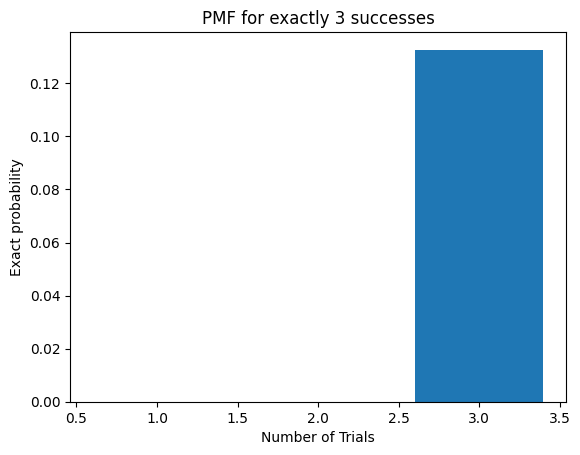

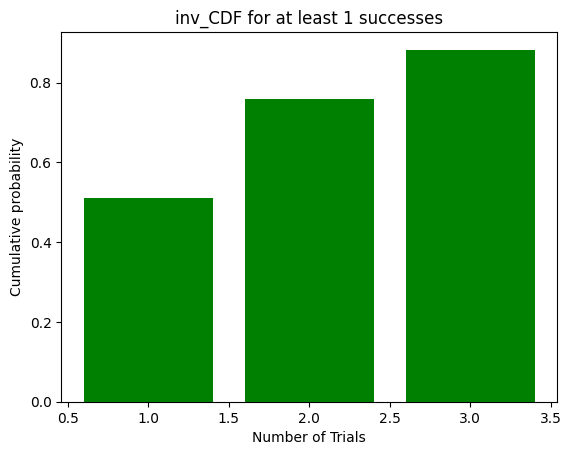

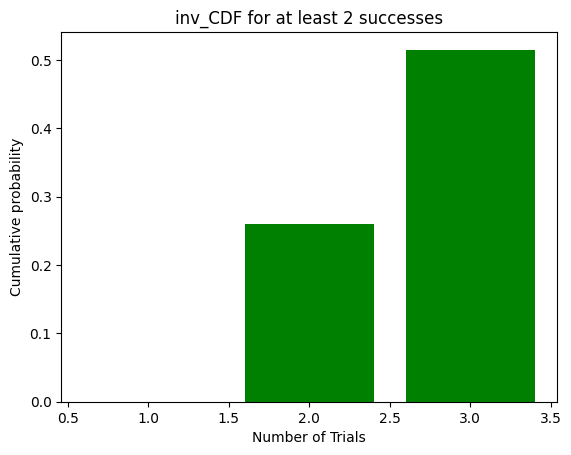

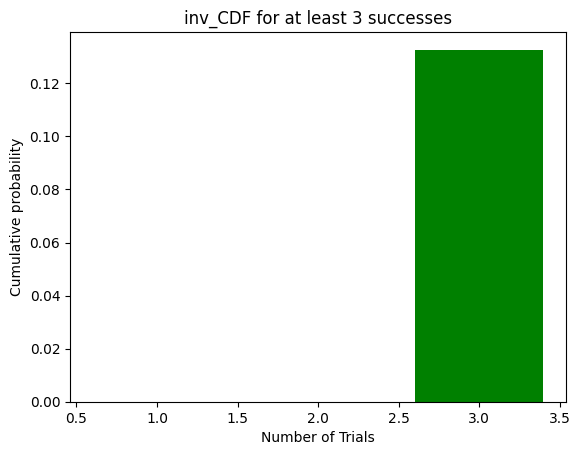

PMF 0.382347
inv_CDF 0.5149980000000001


In [15]:
# While it is said that the probabilities of having a boy or a girl are the same, let’s assume that the actual probability of having a boy is slightly higher at 0.51. Suppose a couple plans to have 3 children. What is the probability that exactly 2 of them will be boys?

num_child = 3 # three children
prob_boy = 0.51 # prob of having a boy

PMF_all_counts, inv_CDF_all_counts  = binom_from_multinom(n_trials=num_child, p_extract=prob_boy, display = True, max_plots=3)

n_successes = 2 # we want exactly two boys in three trials (check PMF)
n_trials = num_child

print('PMF', PMF_all_counts[n_successes-1][n_trials-1])

print('inv_CDF', inv_CDF_all_counts[n_successes-1][n_trials-1])

C:\Users\Alienware\AppData\Local\Temp\ipykernel_49196\3148302928.py:15: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  [np.math.factorial(i) * (p_extract**x_counts) * ((1-p_extract)**(i-x_counts)) /
C:\Users\Alienware\AppData\Local\Temp\ipykernel_49196\3148302928.py:16: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  (np.math.factorial(x_counts) * np.math.factorial(i-x_counts))


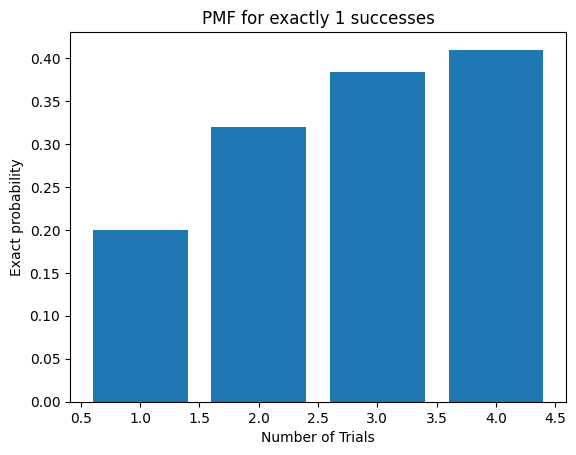

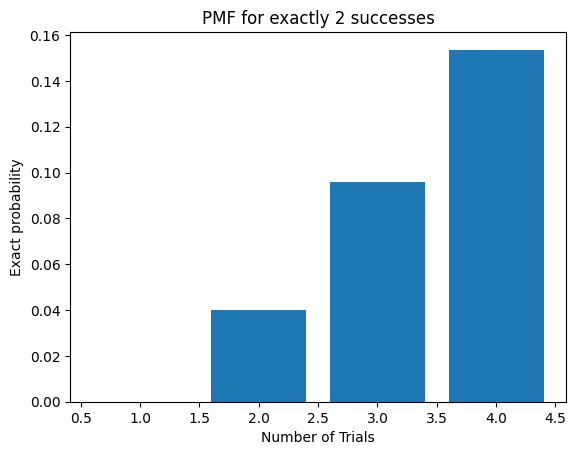

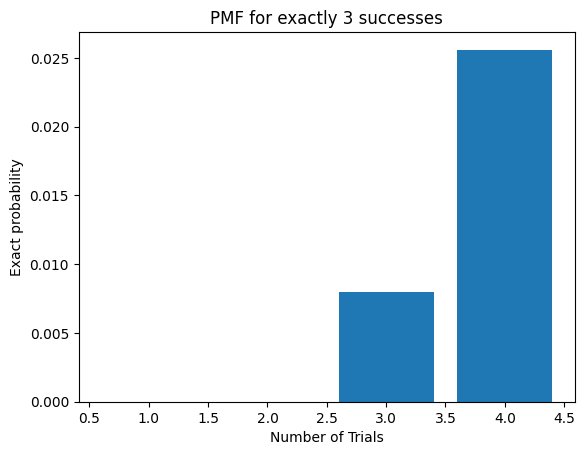

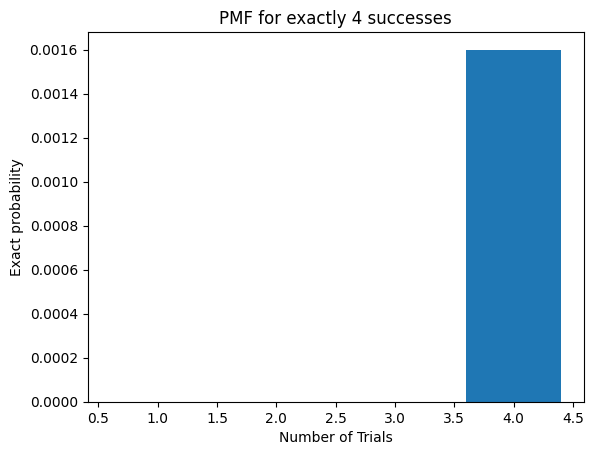

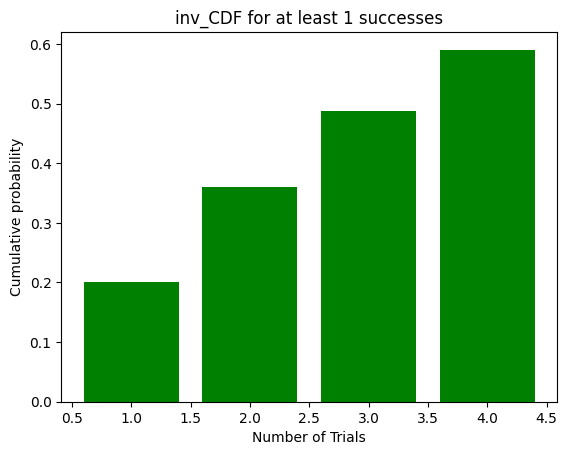

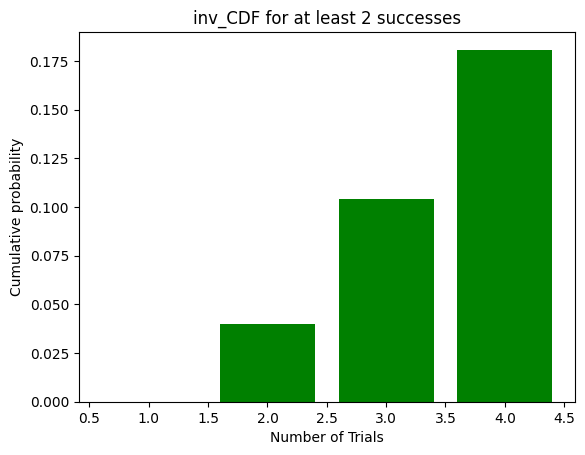

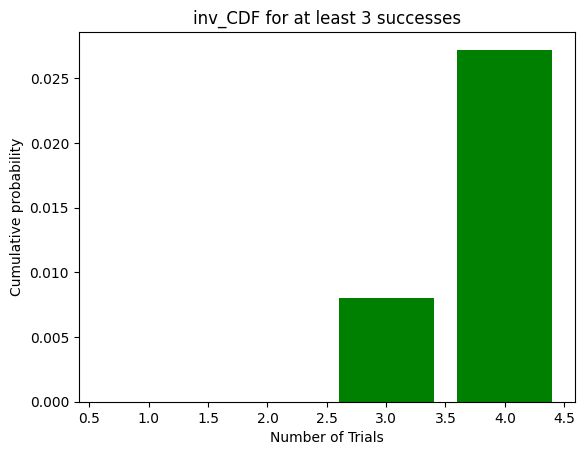

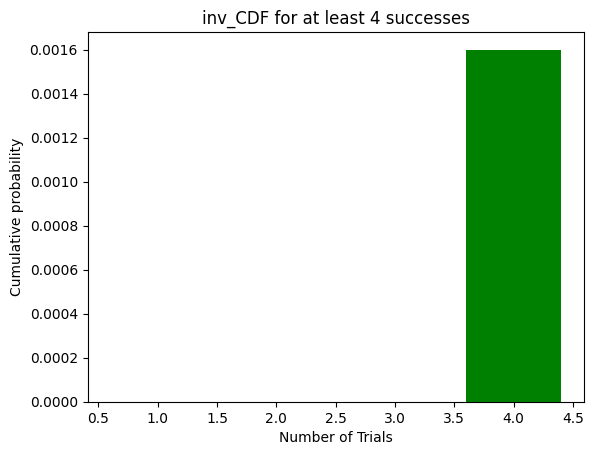

PMF 0.4096000000000002
inv_CDF 0.5904000000000003
p_manual 0.5903999999999998


In [16]:
# In any 15-minute interval, there is a 20% probability that you will see at least one shooting star. What is the proba- bility that you see at least one shooting star in the period of an hour?

num_quarters = 4 # four quarters of a hour in a hour
prob_shoot = 0.2 # prob of shooting star in a quarter

PMF_all_counts, inv_CDF_all_counts  = binom_from_multinom(n_trials=num_quarters, p_extract=prob_shoot, display = True, max_plots=4)

n_successes = 1 # we want at least one shooting star (check  inv_CDF)
n_trials = num_quarters

print('PMF', PMF_all_counts[n_successes-1][n_trials-1])

print('inv_CDF', inv_CDF_all_counts[n_successes-1][n_trials-1])

# quick calculation

print('p_manual', 1 - 0.8*0.8*0.8*0.8) # 1 minus the probability of not seeing any shooting star in four quarters

    